In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv("/content/house_prices.csv")
df


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN,NaN,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN,NaN,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187526,187526,3 BHK Ready to Occupy Flat for sale in Bollywo...,This magnificent 3 BHK Flat is available for s...,63 Lac,3225.0,zirakpur,NaN,Ready to Move,2 out of 4,New Property,...,East,Garden/Park,Bollywood Esencia,3,3,1 Covered,Freehold,1953 sqft,NaN,NaN
187527,187527,3 BHK Ready to Occupy Flat for sale in Sushma ...,Have a look at this immaculate 3 BHK flat for ...,55 Lac,3274.0,zirakpur,NaN,Ready to Move,4 out of 6,Resale,...,North - East,"Garden/Park, Main Road",Sushma Urban Views,3,NaN,1 Covered,NaN,1680 sqft,NaN,NaN
187528,187528,3 BHK Ready to Occupy Flat for sale in Bollywo...,"Gazipur, Zirakpur has an appealing 3 BHK flat ...",76 Lac,4343.0,zirakpur,1250 sqft,Ready to Move,1 out of 3,Resale,...,East,"Garden/Park, Main Road",Bollywood Esencia,3,2,"1 Covered,",Freehold,NaN,NaN,NaN
187529,187529,2 BHK Ready to Occupy Flat for sale in Friends...,Up for immediate sale is a 2 BHK apartment in ...,30 Lac,4231.0,zirakpur,NaN,Ready to Move,2 out of 2,Resale,...,NaN,Main Road,Friends Enclave,2,NaN,NaN,NaN,709 sqft,NaN,NaN


In [15]:
#clean carpet
df['Carpet Area'] = (
    df['Carpet Area']
    .astype(str)
    .str.extract(r'(\d+)')
    .astype(float)
)

In [16]:
#clean price
def clean_price(x):
    s = str(x).replace(" ", "").lower()

    if "lac" in s:
        num = float(re.findall(r'\d+\.?\d*', s)[0])
        return num * 100000

    if "cr" in s:
        num = float(re.findall(r'\d+\.?\d*', s)[0])
        return num * 10000000

    return pd.to_numeric(x, errors='coerce')

df['Price'] = df['Amount(in rupees)'].apply(clean_price)


In [17]:
#Clean Floor column
def extract_floor(x):
    if pd.isna(x):
        return None
    x = str(x).lower()

    if "ground" in x:
        return 0
    if ">" in x:
        nums = re.findall(r'\d+', x)
        return int(nums[0]) if nums else None

    nums = re.findall(r'\d+', x)
    return int(nums[0]) if nums else None

df['Floor'] = df['Floor'].apply(extract_floor)
df['Floor'] = pd.to_numeric(df['Floor'], errors='coerce')



In [18]:
#Clean Bathroom and Balcony columns
df['Bathroom'] = pd.to_numeric(df['Bathroom'], errors='coerce').fillna(0)
df['Balcony'] = pd.to_numeric(df['Balcony'], errors='coerce').fillna(0)


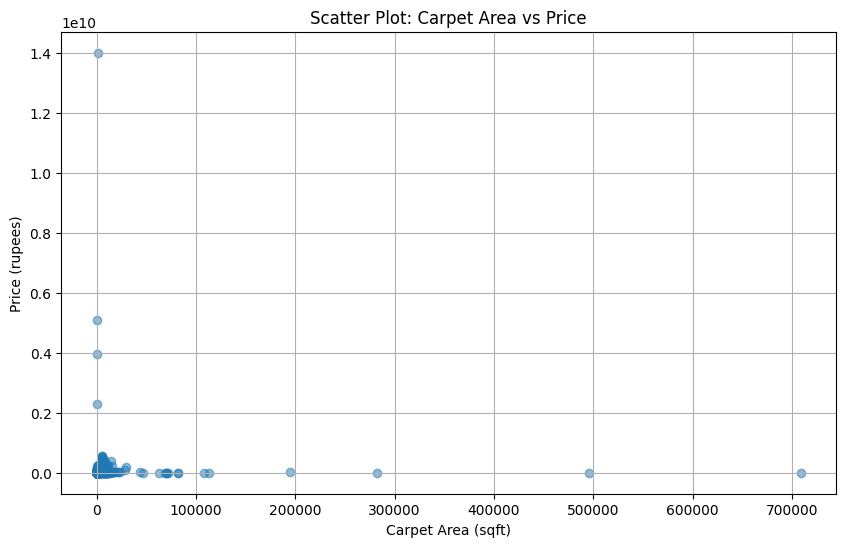

In [19]:
#2 scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df['Carpet Area'], df['Price'], alpha=0.5)
plt.xlabel("Carpet Area (sqft)")
plt.ylabel("Price (rupees)")
plt.title("Scatter Plot: Carpet Area vs Price")
plt.grid(True)
plt.show()

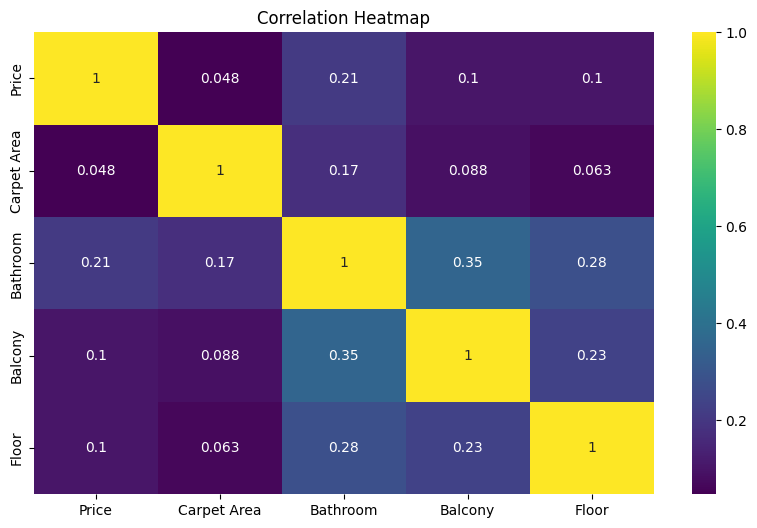

In [20]:
# 3 heatmap
numeric_cols = ['Price', 'Carpet Area', 'Bathroom', 'Balcony', 'Floor']
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()


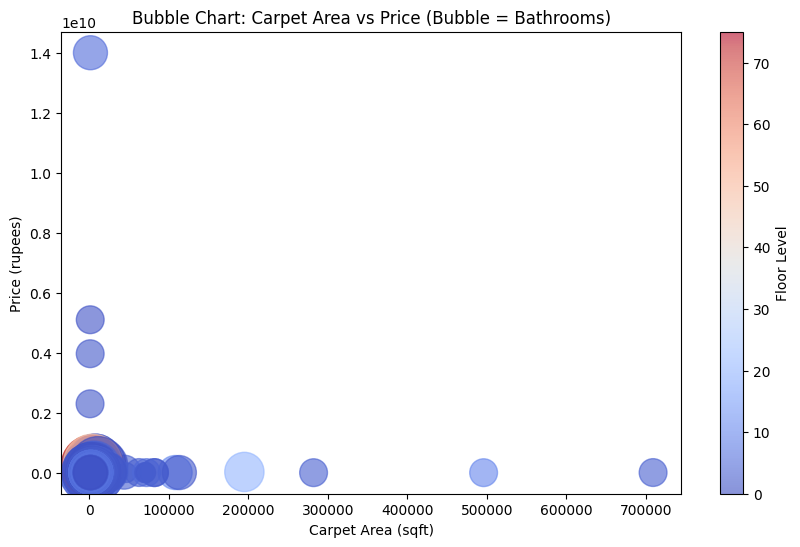

In [21]:
#bubble chart

plt.figure(figsize=(10,6))
plt.scatter(
    df['Carpet Area'],
    df['Price'],
    s=df['Bathroom'] * 200,
    c=df['Floor'],
    cmap='coolwarm',
    alpha=0.6
)
plt.colorbar(label="Floor Level")
plt.xlabel("Carpet Area (sqft)")
plt.ylabel("Price (rupees)")
plt.title("Bubble Chart: Carpet Area vs Price (Bubble = Bathrooms)")
plt.show()